<a href="https://colab.research.google.com/github/peter159/ChatShape/blob/master/captcha_break.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install tensorflow==2.0.0-beta1, captcha

     |████████████████████████████████| 87.9MB 157kB/s 
     |████████████████████████████████| 3.1MB 32.8MB/s 
     |████████████████████████████████| 501kB 39.0MB/s 
  Found existing installation: tb-nightly 1.14.0a20190301
    Uninstalling tb-nightly-1.14.0a20190301:
      Successfully uninstalled tb-nightly-1.14.0a20190301
  Found existing installation: tf-estimator-nightly 1.14.0.dev2019030115
    Uninstalling tf-estimator-nightly-1.14.0.dev2019030115:
      Successfully uninstalled tf-estimator-nightly-1.14.0.dev2019030115
  Found existing installation: tensorflow 2.0.0a0
    Uninstalling tensorflow-2.0.0a0:
      Successfully uninstalled tensorflow-2.0.0a0


0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ


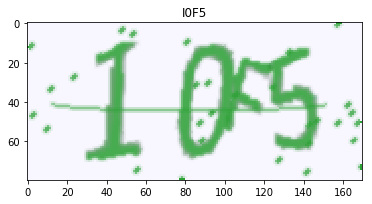

In [4]:
# 导入必要的库
from captcha.image import ImageCaptcha
import matplotlib.pyplot as plt
import numpy as np
import random

import string
characters = string.digits + string.ascii_uppercase
print(characters)

width, height, n_len, n_class = 170, 80, 4, len(characters)

# 生成一张图片看看
generator = ImageCaptcha(width=width, height=height)
random_str = ''.join([random.choice(characters) for j in range(4)])
img = generator.generate_image(random_str)
plt.imshow(img)
plt.title(random_str)
plt.show()

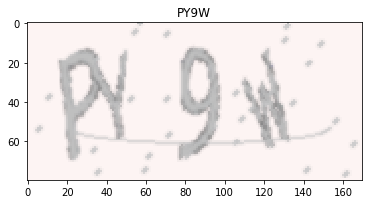

In [5]:
# 定义数据生成器
# from keras.utils.np_utils import to_categorical

def gen(batch_size=32):
    X = np.zeros((batch_size, height, width, 3), dtype=np.uint8)
    y = [np.zeros((batch_size, n_class), dtype=np.uint8) for i in range(n_len)]
    generator = ImageCaptcha(width=width, height=height)
    while True:
        for i in range(batch_size):
            random_str = ''.join([random.choice(characters) for j in range(4)])
            X[i] = generator.generate_image(random_str)
            for j, ch in enumerate(random_str):
                y[j][i, :] = 0
                y[j][i, characters.find(ch)] = 1
        yield X, y

# 测试生成器
def decode(y):
    y = np.argmax(np.array(y), axis=2)[:, 0]
    return ''.join([characters[i] for i in y])

X, y = next(gen(1))
plt.imshow(X[0])
plt.title(decode(y))
plt.show()

In [0]:
# 定义网络结构
import tensorflow as tf
# from keras.models import Model
# from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dropout, Dense

input_tensor = tf.keras.layers.Input((height, width, 3))
x = input_tensor
for i in range(4):
    x = tf.keras.layers.Conv2D(32 * 2 ** i, (3, 3), activation='relu')(x)
    x = tf.keras.layers.Conv2D(32 * 2 ** i, (3, 3), activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D(2, 2)(x)

x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dropout(0.25)(x)
x = [tf.keras.layers.Dense(n_class, activation='softmax', name='c%d' % (i + 1))(x) for i in range(4)]
model = tf.keras.models.Model(inputs=input_tensor, outputs=x)
model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer='adadelta',
              metrics=['accuracy'])

In [7]:
# 网络结构可视化
from keras.utils.vis_utils import plot_model
from IPython.display import Image

plot_model(model, to_file="model.png", show_shapes=True)
Image('model.png')

Using TensorFlow backend.


TypeError: ignored